In [1]:
%cd D:/ML_Projects_PyTorch/SSD/ssd-utils
from PIL import Image
from torch_snippets import *
import numpy as np
import pandas as pd
import cv2
import os
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from numpy import moveaxis
from numpy import asarray
import torchvision
from model import SSD300, MultiBoxLoss
from detect import *

D:\ML_Projects_PyTorch\SSD\ssd-utils


2021-10-05 13:11:46.109 | WARNING  | torch_snippets.torch_loader:<module>:233 - Error: No module named 'pytorch_lightning'
Not importing Lightning Report
2021-10-05 13:11:46.686 | WARNING  | torch_snippets:<module>:13 - sklearn is not found. Skipping relevant imports from submodule `sklegos`
Exception: No module named 'sklego'


In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [3]:
def get_model():
    model = SSD300(3, device)
    optimizer = torch.optim.AdamW(model.parameters(), lr=1e-4, weight_decay=1e-5)
    criterion = MultiBoxLoss(priors_cxcy=model.priors_cxcy, device=device)
    return model

In [4]:
model = get_model()
state_dict=torch.load(r'D:\ML_Projects_PyTorch\SSD\Code Files\SSD.pth')
model.load_state_dict(state_dict)


Loaded base model.



C:\Users\ROHIT MANDAL\AppData\Local\Programs\Python\Python38\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))


<All keys matched successfully>

## Prediction - 1

[[49, 0, 241, 168]] tensor([1]) [0.9422958493232727]


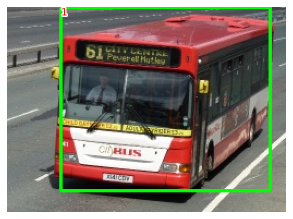

In [11]:
img_path=r'D:\ML_Projects_PyTorch\SSD\Dataset\images\ff8c3836bbaa2658.jpg'
original_image = Image.open(img_path, mode='r')
bbs, labels, scores = detect(original_image, model, min_score=0.6, max_overlap=0.5,top_k=200, device=device)
print(bbs, labels, scores)
show(original_image, bbs=bbs, texts=labels, text_sz=10)

[[0, 62, 170, 140], [194, 86, 244, 109], [161, 81, 202, 112]] tensor([1, 1, 1]) [0.5240036845207214, 0.42350858449935913, 0.2926305830478668]


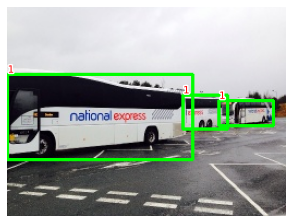

In [12]:
img_path=r'D:\ML_Projects_PyTorch\SSD\Dataset\images\00751332f75e12d2.jpg'
original_image = Image.open(img_path, mode='r')
bbs, labels, scores = detect(original_image, model, min_score=0.25, max_overlap=0.5,top_k=200, device=device)
print(bbs, labels, scores)
show(original_image, bbs=bbs, texts=labels, text_sz=10)

[[33, 31, 202, 157], [186, 54, 255, 100]] tensor([2, 2]) [0.4410877823829651, 0.4340650141239166]


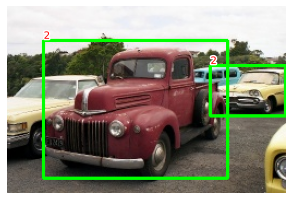

In [13]:
img_path=r'D:\ML_Projects_PyTorch\SSD\Dataset\images\0a5ebc8af9629d58.jpg'
original_image = Image.open(img_path, mode='r')
bbs, labels, scores = detect(original_image, model, min_score=0.25, max_overlap=0.5,top_k=200, device=device)
print(bbs, labels, scores)
show(original_image, bbs=bbs, texts=labels, text_sz=10)

[[14, 4, 224, 185]] tensor([2]) [0.9679649472236633]


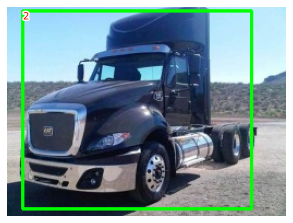

In [14]:
img_path=r'D:\ML_Projects_PyTorch\SSD\Dataset\images\00aaf0a0a9ee7e71.jpg'
img=(cv2.imread(img_path)[:,:,::-1])
img = Image.fromarray(img)
bbs, labels, scores = detect(img, model, min_score=0.25, max_overlap=0.5,top_k=200, device=device)
print(bbs, labels, scores)
show(img, bbs=bbs, texts=labels, text_sz=10)

In [5]:
def detect_img(img):
    img = Image.fromarray(img)
    bbs, labels, scores = detect(img, model, min_score=0.25, max_overlap=0.5,top_k=200, device=device)
    return bbs, labels

In [10]:
video_path=r'D:\ML_Projects_PyTorch\SSD\Bus-Truck.mp4'
Video_Capture = cv2.VideoCapture(video_path) 
while True:
    im, original_image = Video_Capture.read()
    bbs, labels = detect_img(original_image)
    a=bbs[0][0]
    b=bbs[0][1]
    c=bbs[0][2]
    d=bbs[0][3]
    cv2.rectangle(original_image, (a, b), (c, d), (0, 0, 255), 2)
    cv2.imshow('Video_Display', original_image)
    if cv2.waitKey(1) & 0xFF==ord('q'):
        break
Video_Capture.release()
cv2.destroyAllWindows()